In [60]:
install.packages("anticlust")

Installing package into 'C:/Users/Junior/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'glue', 'fs', 'rappdirs', 'lifecycle', 'cli', 'gargle', 'googledrive', 'ids', 'rematch2', 'rlang', 'vctrs'




  There are binary versions available but the source versions are later:
              binary source needs_compilation
glue           1.4.2  1.6.2              TRUE
fs             1.5.0  1.5.2              TRUE
lifecycle      1.0.0  1.0.1             FALSE
cli            2.5.0  3.3.0              TRUE
gargle         1.1.0  1.2.0             FALSE
googledrive    1.0.1  2.0.0             FALSE
rlang         0.4.11  1.0.4              TRUE
vctrs          0.3.8  0.4.1              TRUE
googlesheets4  0.3.0  1.0.1             FALSE

package 'rappdirs' successfully unpacked and MD5 sums checked
package 'ids' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Junior\AppData\Local\Temp\RtmpGYRYG3\downloaded_packages


installing the source packages 'glue', 'fs', 'lifecycle', 'cli', 'gargle', 'googledrive', 'rlang', 'vctrs', 'googlesheets4'



In [62]:
library("anticlust")

In [11]:
summer_school_part <- read.csv("C:\\Users\\Junior\\anaconda_projects\\R-tutorial\\sumschopart.csv", header=TRUE, sep = ',')
summer_school_part

id,flag_edu,flag_uni,flag_personal,flag_tech,flag_topic
1,1,1,1,1,1
2,1,2,2,1,1
3,1,1,2,1,1
4,1,4,1,2,2
5,2,3,2,1,1
6,2,2,1,1,3
7,1,4,1,1,2
8,2,3,1,1,2
9,1,2,2,2,2
10,1,2,2,2,3


In [70]:
anticlusters<-anticlustering(
  summer_school_part[,2:6],
  4,
  objective = "diversity",
  method = "local-maximum",
  preclustering = FALSE,
  categories = NULL,
  repetitions = 10,
  standardize = FALSE
)
anticlusters

[1] 1 3 2 2 2 2 3 1 1 3 4 4 4 3 1

In [71]:
by(summer_school_part[,2:6], anticlusters, function(x) round(colMeans(x), 2))

anticlusters: 1
     flag_edu      flag_uni flag_personal     flag_tech    flag_topic 
         1.25          2.50          1.50          1.25          2.00 
------------------------------------------------------------ 
anticlusters: 2
     flag_edu      flag_uni flag_personal     flag_tech    flag_topic 
         1.50          2.50          1.50          1.25          1.75 
------------------------------------------------------------ 
anticlusters: 3
     flag_edu      flag_uni flag_personal     flag_tech    flag_topic 
         1.25          2.25          1.50          1.25          1.75 
------------------------------------------------------------ 
anticlusters: 4
     flag_edu      flag_uni flag_personal     flag_tech    flag_topic 
         1.33          2.33          1.33          1.33          1.67 

In [72]:
table(anticlusters, summer_school_part$flag_uni)

            
anticlusters 1 2 3 4
           1 1 1 1 1
           2 1 1 1 1
           3 1 2 0 1
           4 1 1 0 1

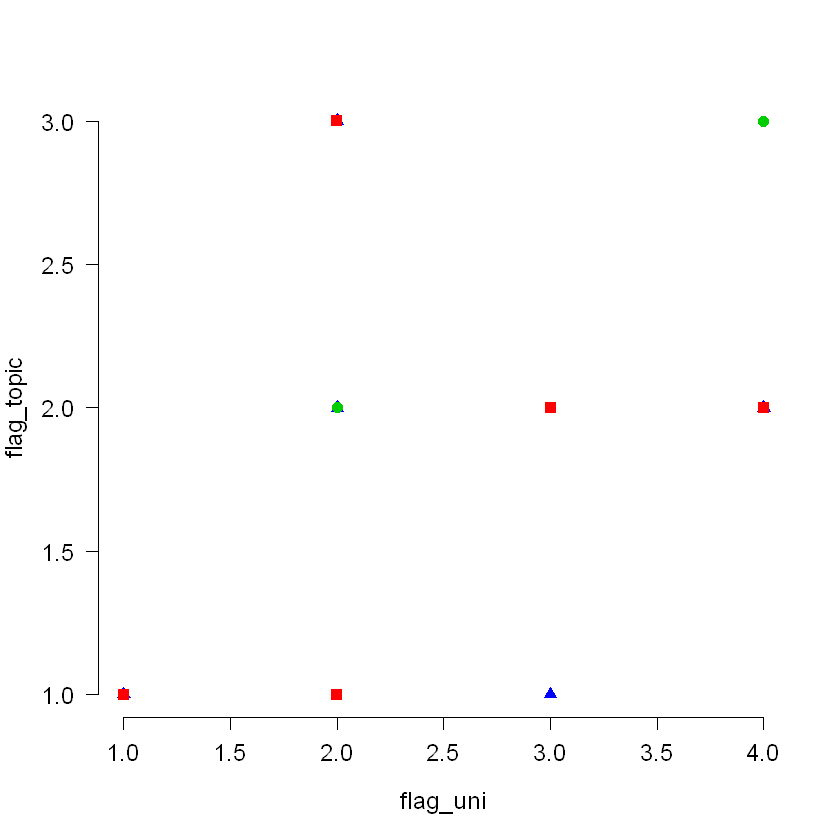

In [53]:
plot_clusters(summer_school_part[,c(3,6) ], clusters = anticlusters, show_axes = TRUE)

In [55]:
class(anticlusters)

[1] "numeric"